In [1]:
% load_ext autoreload
% autoreload 2

In [34]:
import pandas as pd
from shapely import wkt
from shapely.geometry import LineString
import geopandas as gpd
import matplotlib.pyplot as plt

In [98]:
walkability_df = pd.read_csv('data/WALKABILITY.csv', sep=';')
walkability_df

,OBJECTNUMMER,Straatvaknummer,Loopruimte,Walkability_algemeen,Drukte_algemeen,Walkability_recreatief,Drukte_recreatief,Walkability_toeristisch,Drukte_toeristisch,Walkability_werkgerelateerd,Drukte_werkgerelateerd,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,Unnamed: 15
0,1,1,ruim,goed,druk,matig,zeer druk,uitstekend,zeer rustig,uitstekend,zeer rustig,"LINESTRING(4.88493 52.342693,4.884867 52.342696)","LINESTRING(52.342693 4.88493,52.342696 4.884867)",4.884899,52.342695,NaN
1,2,2,zeer ruim,uitstekend,zeer rustig,uitstekend,zeer rustig,uitstekend,zeer rustig,uitstekend,zeer rustig,"LINESTRING(4.93276 52.354894,4.932682 52.354946)","LINESTRING(52.354894 4.93276,52.354946 4.932682)",4.932721,52.354920,NaN
2,3,3,ruim,goed,rustig,goed,rustig,matig,druk,matig,druk,"LINESTRING(4.889813 52.375347,4.889822 52.37535)","LINESTRING(52.375347 4.889813,52.37535 4.889822)",4.889818,52.375349,NaN
3,4,4,ruim,matig,zeer druk,matig,zeer druk,matig,zeer druk,matig,zeer druk,"LINESTRING(4.89343 52.369933,4.893282 52.369381)","LINESTRING(52.369933 4.89343,52.369381 4.893282)",4.893356,52.369657,NaN
4,5,5,krap,goed,zeer rustig,goed,zeer rustig,matig,rustig,matig,rustig,"LINESTRING(4.883258 52.375285,4.88322 52.37530...","LINESTRING(52.375285 4.883258,52.375303 4.8832...",4.883119,52.375293,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9609,9613,9613,krap,goed,zeer rustig,goed,zeer rustig,matig,rustig,matig,rustig,"LINESTRING(4.865319 52.370139,4.864897 52.370283)","LINESTRING(52.370139 4.865319,52.370283 4.864897)",4.865108,52.370211,NaN
9610,9614,9614,ruim,goed,rustig,matig,druk,goed,rustig,goed,rustig,"LINESTRING(4.852033 52.370128,4.852056 52.3700...","LINESTRING(52.370128 4.852033,52.370098 4.8520...",4.852056,52.370120,NaN
9611,9615,9615,krap,matig,rustig,matig,rustig,matig,druk,matig,rustig,"LINESTRING(4.889079 52.375654,4.889084 52.375646)","LINESTRING(52.375654 4.889079,52.375646 4.889084)",4.889081,52.375650,NaN
9612,9616,9616,ruim,uitstekend,zeer rustig,uitstekend,zeer rustig,goed,rustig,goed,rustig,"LINESTRING(4.89696 52.36207,4.897011 52.362065...","LINESTRING(52.36207 4.89696,52.362065 4.897011...",4.897004,52.362093,NaN


In [99]:
walkability_df.rename(columns={'Loopruimte': 'walking_area', 'Walkability_algemeen': 'walkability_general',
                               'Drukte_algemeen': 'busy_general', 'Walkability_recreatief': 'walkability_recreational',
                               'Drukte_recreatief': 'busy_recreational',
                               'Walkability_toeristisch': 'walkability_touristy', 'Drukte_toeristisch': 'busy_touristy',
                               'Walkability_werkgerelateerd': 'walkability_work-related',
                               'Drukte_werkgerelateerd': 'busy_work-related'}, inplace=True)

walkability_df = walkability_df.copy()[['walking_area', 'walkability_general', 'busy_general', 'WKT_LNG_LAT']]
walkability_df.rename(columns={'walkability_general': 'walkability', 'busy_general': 'busyness'}, inplace=True)
walkability_df

,walking_area,walkability,busyness,WKT_LNG_LAT
0,ruim,goed,druk,"LINESTRING(4.88493 52.342693,4.884867 52.342696)"
1,zeer ruim,uitstekend,zeer rustig,"LINESTRING(4.93276 52.354894,4.932682 52.354946)"
2,ruim,goed,rustig,"LINESTRING(4.889813 52.375347,4.889822 52.37535)"
3,ruim,matig,zeer druk,"LINESTRING(4.89343 52.369933,4.893282 52.369381)"
4,krap,goed,zeer rustig,"LINESTRING(4.883258 52.375285,4.88322 52.37530..."
...,...,...,...,...
9609,krap,goed,zeer rustig,"LINESTRING(4.865319 52.370139,4.864897 52.370283)"
9610,ruim,goed,rustig,"LINESTRING(4.852033 52.370128,4.852056 52.3700..."
9611,krap,matig,rustig,"LINESTRING(4.889079 52.375654,4.889084 52.375646)"
9612,ruim,uitstekend,zeer rustig,"LINESTRING(4.89696 52.36207,4.897011 52.362065..."


In [100]:
walkability_df['walking_area'].replace({'zeer krap': 0, 'krap': 1, 'ruim': 2, 'zeer ruim': 3}, inplace=True)
walkability_df['walkability'].replace({'slecht': 0, 'matig': 1, 'goed': 2, 'uitstekend': 3}, inplace=True)
walkability_df['busyness'].replace({'zeer druk': 0, 'druk': 1, 'rustig': 2, 'zeer rustig': 3}, inplace=True)
walkability_df

,walking_area,walkability,busyness,WKT_LNG_LAT
0,2,2,1,"LINESTRING(4.88493 52.342693,4.884867 52.342696)"
1,3,3,3,"LINESTRING(4.93276 52.354894,4.932682 52.354946)"
2,2,2,2,"LINESTRING(4.889813 52.375347,4.889822 52.37535)"
3,2,1,0,"LINESTRING(4.89343 52.369933,4.893282 52.369381)"
4,1,2,3,"LINESTRING(4.883258 52.375285,4.88322 52.37530..."
...,...,...,...,...
9609,1,2,3,"LINESTRING(4.865319 52.370139,4.864897 52.370283)"
9610,2,2,2,"LINESTRING(4.852033 52.370128,4.852056 52.3700..."
9611,1,1,2,"LINESTRING(4.889079 52.375654,4.889084 52.375646)"
9612,2,3,3,"LINESTRING(4.89696 52.36207,4.897011 52.362065..."


In [101]:
walkability_df['WKT_LNG_LAT'] = gpd.GeoSeries.from_wkt(walkability_df['WKT_LNG_LAT'])

In [124]:
walkability_gdf = gpd.GeoDataFrame(walkability_df, geometry='WKT_LNG_LAT')

walkability_gdf

,walking_area,walkability,busyness,WKT_LNG_LAT
0,2,2,1,"LINESTRING (4.88493 52.34269, 4.88487 52.34270)"
1,3,3,3,"LINESTRING (4.93276 52.35489, 4.93268 52.35495)"
2,2,2,2,"LINESTRING (4.88981 52.37535, 4.88982 52.37535)"
3,2,1,0,"LINESTRING (4.89343 52.36993, 4.89328 52.36938)"
4,1,2,3,"LINESTRING (4.88326 52.37528, 4.88322 52.37530..."
...,...,...,...,...
9609,1,2,3,"LINESTRING (4.86532 52.37014, 4.86490 52.37028)"
9610,2,2,2,"LINESTRING (4.85203 52.37013, 4.85206 52.37010..."
9611,1,1,2,"LINESTRING (4.88908 52.37565, 4.88908 52.37565)"
9612,2,3,3,"LINESTRING (4.89696 52.36207, 4.89701 52.36207..."


In [125]:
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# world

<AxesSubplot:>

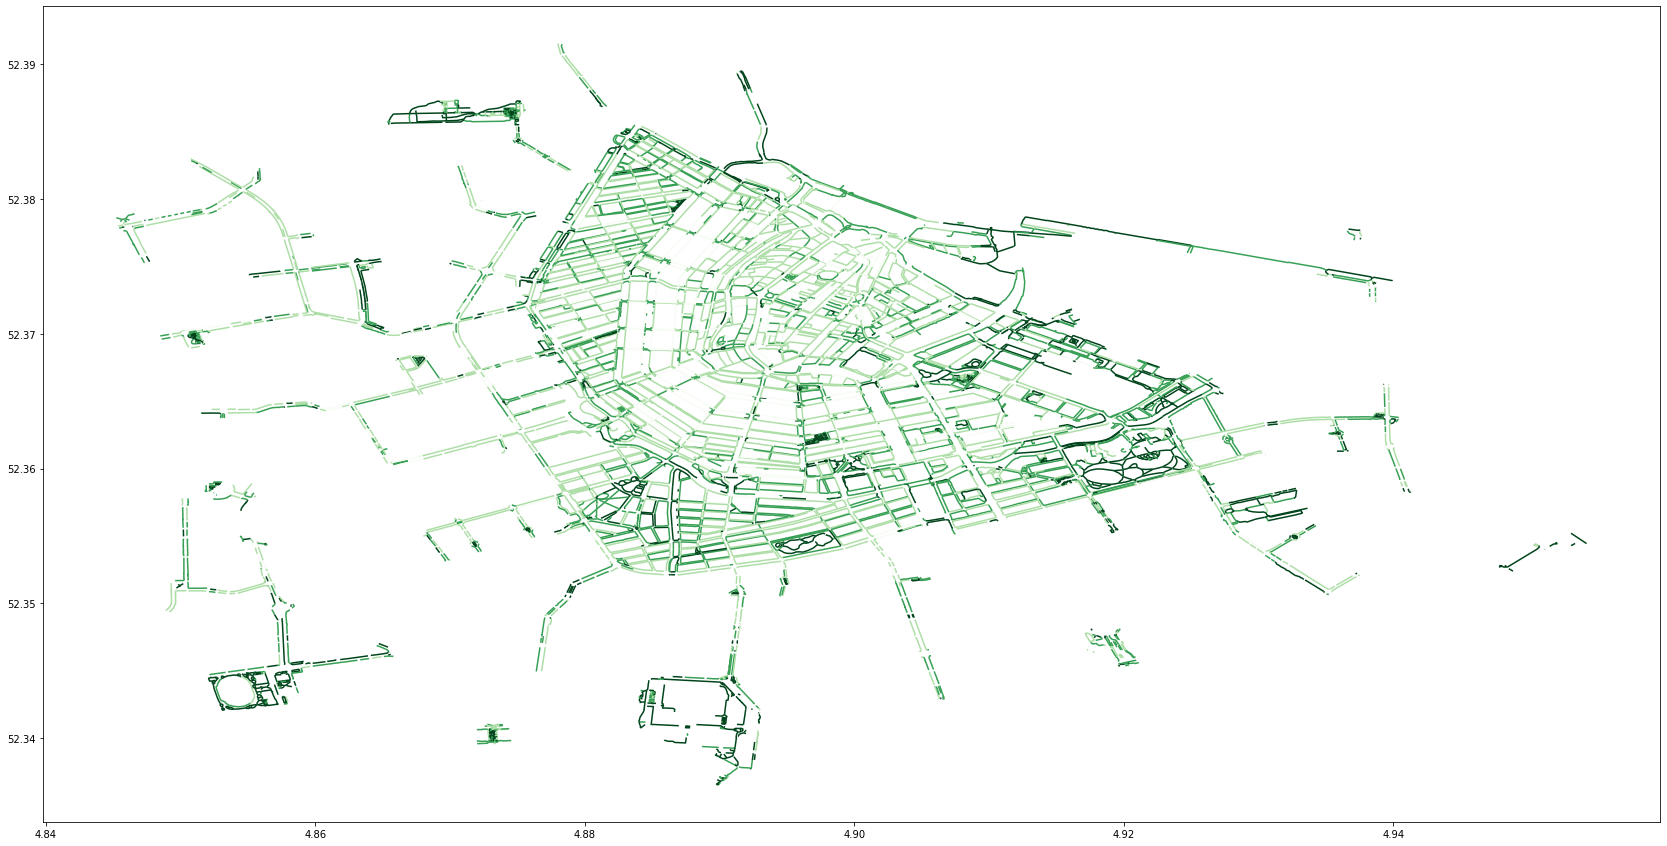

In [129]:
# ax = world[world['name'] == 'Netherlands'].plot(color='white', edgecolor='black', figsize=(20,10))
fig, ax = plt.subplots(1, 1, figsize=(30, 15))
walkability_gdf.plot(ax=ax, column='walkability', cmap='Greens')
# ax
# plt.show()

['naturalearth_lowres', 'naturalearth_cities', 'nybb']